In [3]:
from mglearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mglearn.plots import plot_2d_separator
import matplotlib.pyplot as plt
import numpy as np

c:\python\venv\nlp\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


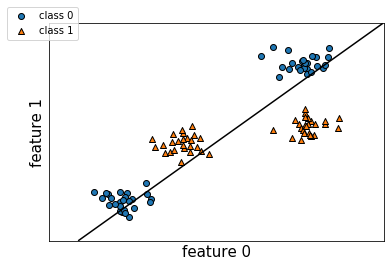

In [5]:
x, y = make_blobs(centers=4, random_state=8)
y = y%2

linear_svm = LinearSVC().fit(x,y)
plot_2d_separator(linear_svm, x, fill = False)
marker_set = ['o', '^']
for i,m in zip(np.unique(y), marker_set):
    plt.scatter(x[y==i][:, 0], x[y==i][:, 1], marker=m,

                label='class {}'.format(i), edgecolors='k')

plt.legend(bbox_to_anchor=(0.1, 1.1), fancybox=True)

plt.xlabel('feature 0', size=15)

plt.ylabel('feature 1', size=15)

plt.show()

[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


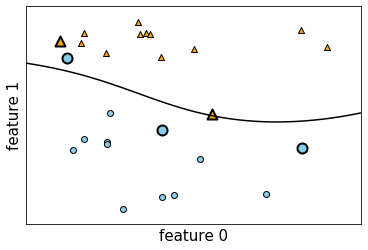

In [6]:
from sklearn.svm import SVC

from mglearn.tools import make_handcrafted_dataset

from mglearn.plots import plot_2d_separator



x, y = make_handcrafted_dataset()



svm = SVC(kernel='rbf', C=10, gamma=0.1) # kernel, 규제정도, 커널폭의 역수

svm.fit(x, y)



plot_2d_separator(svm, x, eps=0.5)  # epsilon



marker_set = ['o', '^']

color_set = ['skyblue', 'orange']

class_set = np.unique(y)

for i, m, color in zip(class_set, marker_set, color_set):

    plt.scatter(x[y==i][:, 0], x[y==i][:, 1], marker=m, 

label='class {}'.format(i), edgecolors='k', c=color)



sv = svm.support_vectors_

print('{}'.format(sv))

# [[ 8.1062269   4.28695977]

#  [ 9.50169345  1.93824624]

#  [11.563957    1.3389402 ]

#  [10.24028948  2.45544401]

#  [ 7.99815287  4.8525051 ]]



# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.

sv_labels = svm.dual_coef_.ravel() > 0 # 중요도가 0보다 높은  것, 클래스 구분

idx_set = [~sv_labels, sv_labels]



for idx,m, color in zip(idx_set, marker_set, color_set):

    plt.scatter(sv[idx][:, 0], sv[idx][:, 1],  s=100, 

marker=m, edgecolors='k', linewidths=2, c=color)



plt.xlabel('feature 0', size=15)

plt.ylabel('feature 1', size=15) 

plt.show() 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.svm import SVC

wine = load_wine()

x_train, x_test, y_train, y_test = train_test_split(
      wine.data, wine.target, stratify=wine.target,
      random_state=0, test_size=0.25)

svc = SVC(random_state=0) # default: C=1, kernel='rbf', gamme='auto'
svc.fit(x_train, y_train) 

train_score = svc.score(x_train, y_train)
test_score = svc.score(x_test, y_test)

print('{:.3f}'.format(train_score))
# 1.000

print('{:.3f}'.format(test_score))
# 0.422

0.722
0.600


In [18]:
x_train.shape

(133, 13)

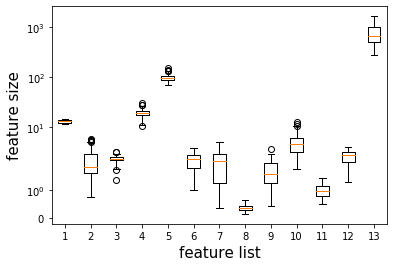

In [10]:
plt.boxplot(x_train) # manage_xticks: x축 눈금 작은 눈금 표시
plt.yscale('symlog') # y축 로그 스케일
plt.xlabel('feature list', size =15) 
plt.ylabel('feature size', size =15)
plt.show()

In [13]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
print('{}'.format(cancer.keys()))
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svc = SVC(C=1, kernel='rbf', gamma='auto', degree=3)
svc.fit(x_train_scaled, y_train)
pre_train_score = svc.score(x_train_scaled, y_train)
print('{:.3f}'.format(pre_train_score))

# 0.955

pre_test_score = svc.score(x_test_scaled, y_test)
print('{:.3f}'.format(pre_test_score))

# 0.951

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
0.955
0.951


In [16]:
x_train.shape

(426, 30)